In [25]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout,execute_plot

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../outputs/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [27]:
random_runs = [
'kobybibas/pnml_for_active_learning/6xslqnjs',
'kobybibas/pnml_for_active_learning/1svczse4',
'kobybibas/pnml_for_active_learning/msrfpqdu',
'kobybibas/pnml_for_active_learning/2w4pu8pn',
'kobybibas/pnml_for_active_learning/3f013vbp',
'kobybibas/pnml_for_active_learning/90gmbw88'
]
bald_runs = [
    'kobybibas/pnml_for_active_learning/hwg1nvgl',
    'kobybibas/pnml_for_active_learning/1463s9my',
    'kobybibas/pnml_for_active_learning/9lyales0',
    'kobybibas/pnml_for_active_learning/2bwt47ln',
    'kobybibas/pnml_for_active_learning/17ir0cxz',
    'kobybibas/pnml_for_active_learning/1im4he7k'
]
pnml_runs = [
    'kobybibas/pnml_for_active_learning/3lh41s0h',
    'kobybibas/pnml_for_active_learning/3gzfkqty',
    'kobybibas/pnml_for_active_learning/17loxcs0',
    'kobybibas/pnml_for_active_learning/9o3bwvan',
    'kobybibas/pnml_for_active_learning/211wpqk3',
    'kobybibas/pnml_for_active_learning/19j70ywf'
]

random_dfs = process_results(api=api,run_list=random_runs)
bald_dfs = process_results(api=api,run_list=bald_runs)
pnml_dfs = process_results(api=api,run_list=pnml_runs)

kobybibas/pnml_for_active_learning/6xslqnjs
kobybibas/pnml_for_active_learning/1svczse4
kobybibas/pnml_for_active_learning/msrfpqdu
kobybibas/pnml_for_active_learning/2w4pu8pn
kobybibas/pnml_for_active_learning/3f013vbp
kobybibas/pnml_for_active_learning/90gmbw88
kobybibas/pnml_for_active_learning/hwg1nvgl
kobybibas/pnml_for_active_learning/1463s9my
kobybibas/pnml_for_active_learning/9lyales0
kobybibas/pnml_for_active_learning/2bwt47ln
kobybibas/pnml_for_active_learning/17ir0cxz
kobybibas/pnml_for_active_learning/1im4he7k
kobybibas/pnml_for_active_learning/3lh41s0h
kobybibas/pnml_for_active_learning/3gzfkqty
kobybibas/pnml_for_active_learning/17loxcs0
kobybibas/pnml_for_active_learning/9o3bwvan
kobybibas/pnml_for_active_learning/211wpqk3
kobybibas/pnml_for_active_learning/19j70ywf


In [28]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs,rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs,rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs,rolling_size=rolling_size)


EMNIST


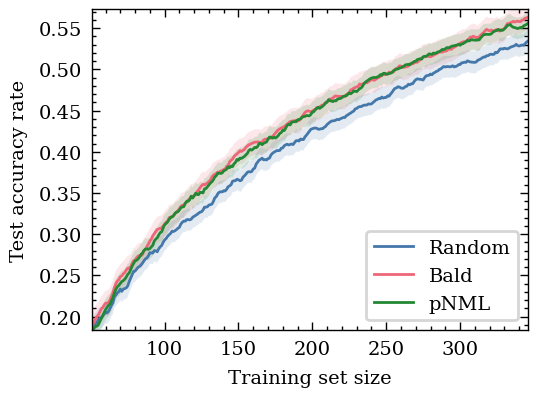

In [29]:
plt.style.use(["science", "bright",'no-latex'])
fig, ax = plt.subplots(1, 1, dpi=200, figsize=(4*0.7, 3*0.7))
fig,ax = execute_plot(random_res,bald_res,pnml_res,fig,ax)
print("EMNIST")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "emnist.pdf"))
plt.show()